In [37]:
import os
import cv2
import json
import matplotlib.pyplot as plt

VAIPE_P_TRAIN_0.json
['VAIPE_P_0_0.json', 'VAIPE_P_0_1.json', 'VAIPE_P_0_2.json', 'VAIPE_P_0_3.json', 'VAIPE_P_0_4.json', 'VAIPE_P_0_5.json', 'VAIPE_P_0_6.json', 'VAIPE_P_0_7.json', 'VAIPE_P_0_8.json', 'VAIPE_P_0_9.json', 'VAIPE_P_0_10.json', 'VAIPE_P_0_11.json', 'VAIPE_P_0_12.json', 'VAIPE_P_0_13.json', 'VAIPE_P_0_14.json', 'VAIPE_P_0_15.json', 'VAIPE_P_0_16.json', 'VAIPE_P_0_17.json', 'VAIPE_P_0_18.json', 'VAIPE_P_0_19.json', 'VAIPE_P_0_20.json', 'VAIPE_P_0_21.json', 'VAIPE_P_0_22.json', 'VAIPE_P_0_23.json', 'VAIPE_P_0_24.json', 'VAIPE_P_0_25.json', 'VAIPE_P_0_26.json', 'VAIPE_P_0_27.json', 'VAIPE_P_0_28.json', 'VAIPE_P_0_29.json', 'VAIPE_P_0_30.json', 'VAIPE_P_0_31.json', 'VAIPE_P_0_32.json']


[ WARN:0@1432.252] global /io/opencv/modules/imgcodecs/src/loadsave.cpp (239) findDecoder imread_('../data/public_train/pill/VAIPE_P_0_0.json'): can't open/read file: check file path/integrity


TypeError: Image data of dtype object cannot be converted to float

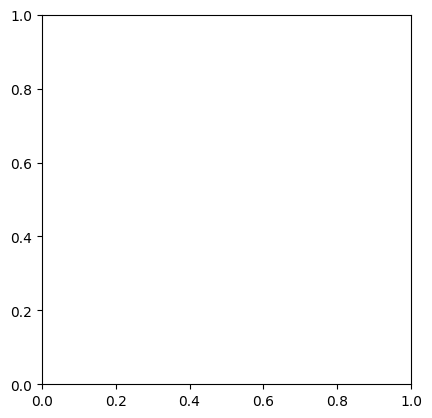

In [38]:

def get_data(public_train_path):
    pill_path = os.path.join(public_train_path, "pill")
    pres_path = os.path.join(public_train_path, "prescription")
    pill_pres_map_path = os.path.join(public_train_path, "pill_pres_map.json")
    pill_pres_map = json.load(open(pill_pres_map_path))
    for pres_pill in pill_pres_map:
        pres_id = pres_pill["pres"]
        list_image_pill = pres_pill["pill"]
        print(pres_id)
        print(list_image_pill)
        for image_pill in  list_image_pill:
            image_pill_path = os.path.join(pill_path, image_pill)
            image_pill = cv2.imread(image_pill_path)
            
        break

get_data(public_train_path)

In [74]:
public_train_path = "../data/public_train/"
def get_data(pill_image_name_file, public_train_path):
    pill_image_id = pill_image_name_file[:-4]
    pill_json_name = pill_image_id + ".json"
    pill_json_path = os.path.join(public_train_path, "pill", "label", pill_json_name)
    pres_json_name = pill_image_id.split("_")[:-1][0]+"_"+pill_image_id.split("_")[:-1][1]+"_"+"TRAIN"+"_"+pill_image_id.split("_")[:-1][2]+".json"
    pres_json_path = os.path.join(public_train_path, "prescription", "label", pres_json_name)
    pill_json = json.load(open(pill_json_path))
    pres_json = json.load(open(pres_json_path))
    pill_image = cv2.imread(os.path.join(public_train_path, "pill", "image", pill_image_name_file))
    result = []
    for pill_box in pill_json:
        x = pill_box["x"]
        y = pill_box["y"]
        w = pill_box["w"]
        h = pill_box["h"]
        label = pill_box["label"]
        pill_crop_image = pill_image[y:y+h, x:x+w]
        pill_crop_image_rgb = cv2.cvtColor(pill_crop_image, cv2.COLOR_BGR2RGB)

        pill_dict = {}
        if label == 107:
            pill_dict["pill_image"] = pill_crop_image_rgb
            pill_dict["drugname"] = "MOT LINH BAY"
            pill_dict["id"] = label
        else:
            for pres_box in pres_json:
                if pres_box["label"] == "drugname":
                    if pres_box["mapping"] == label:
                        pill_dict["pill_image"] = pill_crop_image_rgb
                        pill_dict["drugname"] = pres_box["text"]
                        pill_dict["id"] = pres_box["mapping"]
                        break
        result.append(pill_dict)
    return result

result =  get_data("VAIPE_P_1159_30.jpg" , public_train_path)


1) CARUDXAN 2mg
23
1) CARUDXAN 2mg
23
mot linh bay
107
mot linh bay
107
